<a href="https://colab.research.google.com/github/carmeniturbe/ejercicios_Machine_Learning/blob/main/5_%C2%BFRegresi%C3%B3n_log%C3%ADstica%2C_bosque_aleatorio_o_KNN%3F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#¿Regresión logística, bosque aleatorio o KNN?
##Tarea
Para esta tarea, se utilizará el conjunto de datos de variedades de vino (que implica predecir el tipo de uva basándose en sus características).

La tarea es:

1) Utilizar un modelo de regresión logística e intentar tanto la regularización L1 como L2. Esta es una gran oportunidad para mostrar que afinar los hiperparámetros puede afectar los resultados del modelo.

2) Después de hacer eso, intenter usar los modelos de KNN y bosque aleatorio.

3) Aborden estas preguntas en una celda de texto al final de sus códigos:

¿Cuál es el modelo que mejor funciona?

¿Cuáles hiperparámetros afinaron para cada uno de los modelos? ¿Hay algún modelo que les gustó más y por qué?

In [261]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector
from sklearn.compose import make_column_transformer
import plotly.express as px


In [262]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [263]:
df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Science - Coding Dojo/Data/Wine_cultivars.csv')
df.head()

,Class label,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavonid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [264]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class label                   178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic Acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavonid phenols           178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

In [265]:
df['Class label'].value_counts()

2    71
1    59
3    48
Name: Class label, dtype: int64

In [266]:
total_duplicates = df.duplicated().sum()
print(total_duplicates)

0


<Axes: >

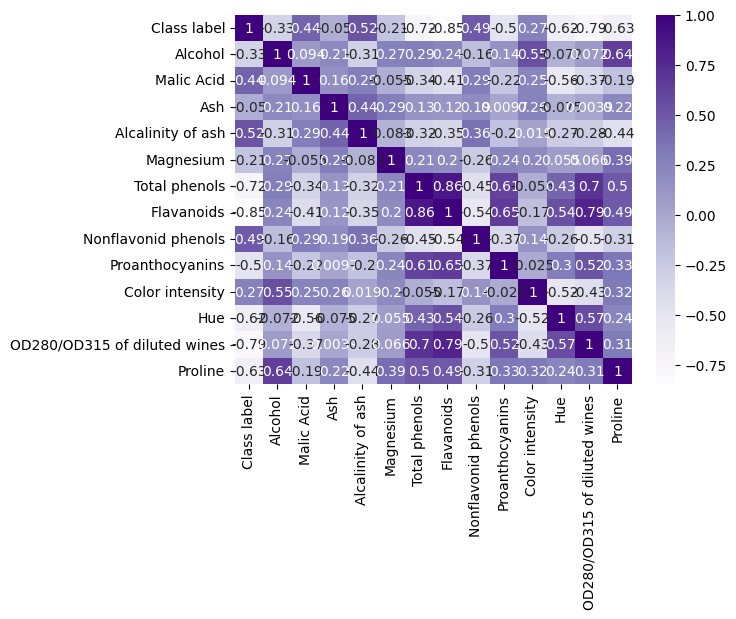

In [267]:
corr = df.corr()
sns.heatmap(corr, cmap = 'Purples', annot = True)

In [268]:
#Feature matrix and target vector
X = df.drop(columns = 'Class label')
y = df['Class label']
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [269]:
print(f"the X_train shape is {X_train.shape}")
print(f"the X_test shape is {X_test.shape}")
print(f"the Y_train shape is {y_train.shape}")
print(f"the Y_test shape is {y_test.shape}")


the X_train shape is (133, 13)
the X_test shape is (45, 13)
the Y_train shape is (133,)
the Y_test shape is (45,)


In [270]:
#scale the data

num_selector = make_column_selector(dtype_include='number')
scaler = StandardScaler()
num_tuple = (scaler, num_selector)
col_transformer = make_column_transformer(num_tuple, remainder = 'passthrough')

In [271]:
# Entrenamos el transformador con datos de entrenamiento
col_transformer.fit(X_train, X_test)

ColumnTransformer(remainder='passthrough',
                  transformers=[('standardscaler', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7e5c17db4910>)])

In [272]:
# trnasofrmamos finalmente los datos
X_train = col_transformer.transform(X_train)
X_test = col_transformer.transform(X_test)

In [273]:
# Convertimos a dataframe para visualizar mejor
X_train = pd.DataFrame(X_train)
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.226328,-0.024519,1.101127,-0.241394,0.016101,0.812935,1.216668,-0.502463,2.090070,0.301887,0.301960,0.770065,1.445831
1,-1.079807,-0.280281,-2.368742,-0.559842,-0.251581,-0.073170,0.148537,-0.818807,-0.362996,-0.782781,1.329088,0.481291,-0.107920
2,-0.668617,1.866297,1.315759,2.045642,0.083022,-0.119807,0.108607,0.525654,0.176331,-1.338787,-0.168807,0.701309,-1.236434
3,-0.475115,-1.001897,-0.937868,0.163904,0.149942,-1.239098,-1.438686,1.316514,-0.362996,1.176913,-1.623905,-1.457623,-0.336894
4,1.036615,-0.673059,0.850725,-0.646691,-0.452343,0.268836,0.967105,-1.135151,1.185393,0.265427,1.200697,1.045088,1.707515


#Logistic regression

It seems like we have three target classes so we'll use the OvR strategy to adapt our Logistic Regression model:

"One-vs-Rest (OvR) / One-vs-All (OvA):
In this approach, you build a separate binary logistic regression classifier for each class. For each classifier, you treat that class as the positive class and the rest of the classes as the negative class. During prediction, you obtain a probability score from each classifier, and the class with the highest probability is the predicted class."

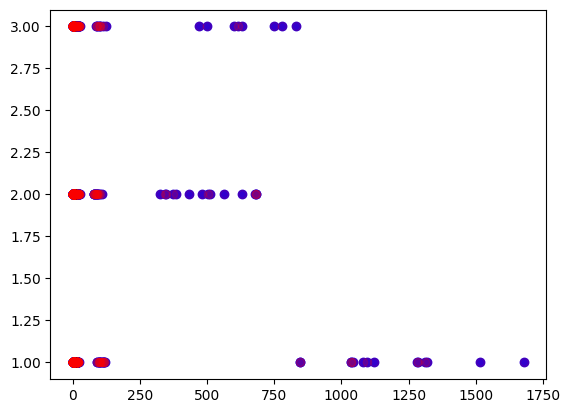

In [302]:
#Logistic Regression model with OvR strategy
logreg = LogisticRegression(multi_class='ovr', C=0.1, max_iter=1000, penalty='l2')

# Train the model on the training data
logreg.fit(X_train, y_train)

#Make predictions on the test data
y_pred_ovr = logreg.predict(X_test)

# Gráfico datos reales test vs predicciones de test
plt.plot(X_test, y_test,'bo')
plt.plot(X_test, logreg.predict(X_test), 'ro', alpha=0.2)
plt.show()


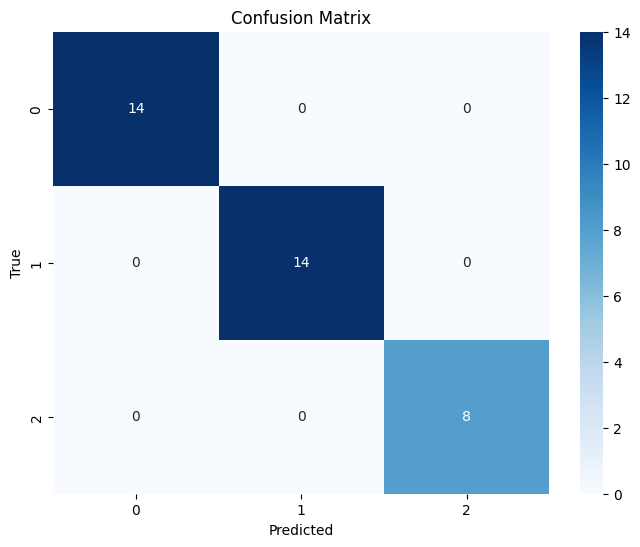

0.971830985915493
Accuracy: 1.0


In [303]:
#Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_ovr)

#Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#Checking accuracy on the training data
print(logreg.score(X_train, y_train))

#Checking accuracy on the testing data
accuracy = accuracy_score(y_test, y_pred_ovr)
print("Accuracy:", accuracy)

In [304]:
print(logreg.score(X_train, y_train))
print(logreg.score(X_test, y_test))

0.971830985915493
1.0


In [305]:
#classification report of logistic regression model
#y_pred_ovr_test = logreg_ovr.predict(X_test)
logistic_classification_report = classification_report(y_test, y_pred_ovr)
print("Classification Report for logistic regression model on Testting Data:")
print(logistic_classification_report)


Classification Report for logistic regression model on Testting Data:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



#Afinación L1

{0.0001: 0.3333333333333333,
 0.001: 0.3333333333333333,
 0.01: 0.3333333333333333,
 0.1: 1.0,
 1: 0.9777777777777777,
 10: 0.9777777777777777,
 100: 0.9777777777777777,
 1000: 0.9777777777777777}

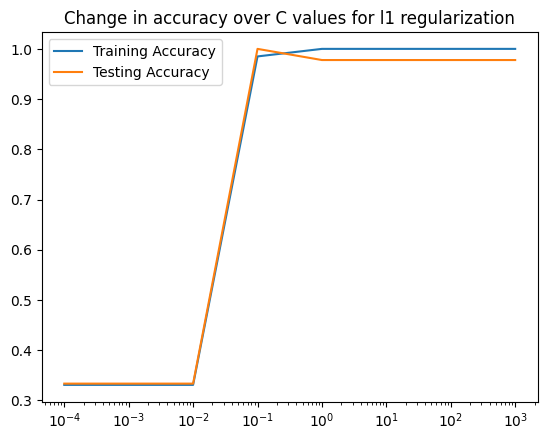

In [278]:
# create a list of c values and empty lists for scores
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []
#iterative over the c values
for c in c_values:

  # instantiate a model with each value of c and fit it on the data
  log_reg = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l1')
  log_reg.fit(X_train, y_train)

  # add the training and testing scores to our scores lists
  train_scores.append(log_reg.score(X_train, y_train))
  test_scores.append(log_reg.score(X_test, y_test))

#plot the change in accuracy as we change the value of C
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label='Training Accuracy')
ax.plot(c_values, test_scores, label='Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C values for l1 regularization')
ax.legend()

#set the x axis to a logarithmic scale to show the values of C in even intervals
ax.set_xscale('log')
# print a dictionary of values of C and accuracy scores
{c:score for c, score in zip(c_values, test_scores)}

# Afinación L2

{0.0001: 0.3333333333333333,
 0.001: 0.3333333333333333,
 0.01: 0.3333333333333333,
 0.1: 1.0,
 1: 0.9777777777777777,
 10: 0.9777777777777777,
 100: 0.9777777777777777,
 1000: 0.9777777777777777}

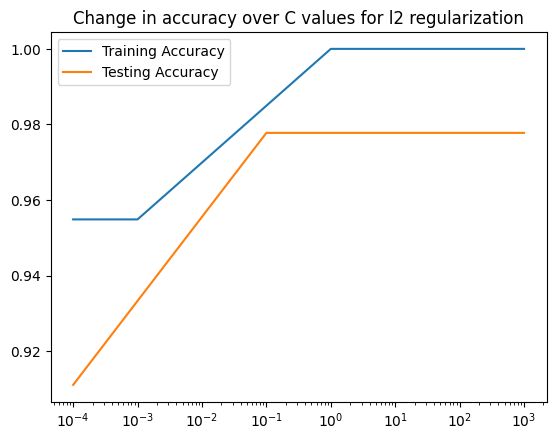

In [279]:
# create a list of c values and empty lists for scores
c_values_l2 = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores_l2 = []
test_scores_l2 = []
#iterative over the c values
for c in c_values:
  # instantiate a model with each value of c and fit it on the data
  log_reg_l2 = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l2')
  log_reg_l2.fit(X_train, y_train)

  # add the training and testing scores to our scores lists
  train_scores_l2.append(log_reg_l2.score(X_train, y_train))
  test_scores_l2.append(log_reg_l2.score(X_test, y_test))

#plot the change in accuracy as we change the value of C
fig, ax = plt.subplots(1,1)
ax.plot(c_values_l2, train_scores_l2, label='Training Accuracy')
ax.plot(c_values_l2, test_scores_l2, label='Testing Accuracy')
ax.set_xticks(c_values_l2)
ax.set_title('Change in accuracy over C values for l2 regularization')
ax.legend()
#set the x axis to a logarithmic scale to show the values of C in even intervals
ax.set_xscale('log')
# print a dictionary of values of C and accuracy scores
{c:score for c, score in zip(c_values_l2, test_scores)}

#KNN

Accuracy (KNN): 0.9555555555555556


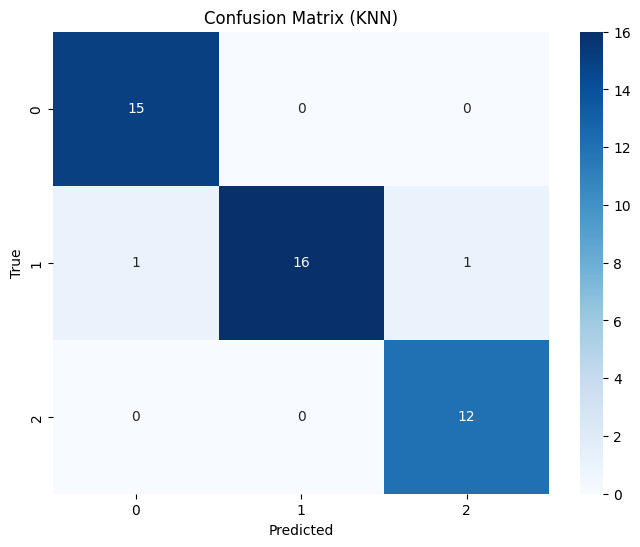

In [280]:
# Create a KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k) as needed

# Train the model on the training data
knn_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_knn = knn_model.predict(X_test)

# Calculate accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy (KNN):", accuracy_knn)

# Create a confusion matrix for KNN
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (KNN)')
plt.show()

In [281]:
#classification report for KNN model
knn_classification_report = classification_report(y_test, y_pred_knn)
print("Classification Report for knn model on Testing Data with 3 neighbors:")
print(knn_classification_report)


Classification Report for knn model on Testing Data with 3 neighbors:
              precision    recall  f1-score   support

           1       0.94      1.00      0.97        15
           2       1.00      0.89      0.94        18
           3       0.92      1.00      0.96        12

    accuracy                           0.96        45
   macro avg       0.95      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [282]:
print(knn_model.score(X_train, y_train))
print(knn_model.score(X_test, y_test))

0.9774436090225563
0.9555555555555556


#We'll search what would be the best number of neightbors for this model

In [283]:
param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15]}
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_k = grid_search.best_params_['n_neighbors']
best_score = grid_search.best_score_
print(f"Best k: {best_k}, Best Score: {best_score:.4f}")


Best k: 5, Best Score: 0.9479


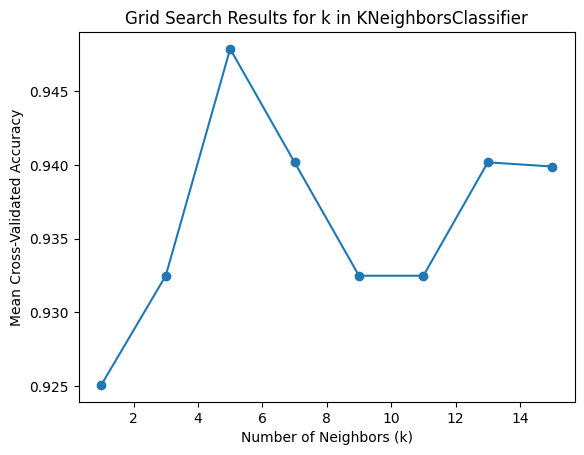

In [284]:
results = grid_search.cv_results_
plt.plot(param_grid['n_neighbors'], results['mean_test_score'], marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Cross-Validated Accuracy')
plt.title('Grid Search Results for k in KNeighborsClassifier')
plt.show()

The chart on top represents the best number of neighbors we could use for this model. The best approach would be 1 best on the results but I'll go with the second best approach to avoid overfitting of the model.

Conclusion: I tried the model with 11 neighbors as recommended by the grid search but in reality the best result was obtained with 3 nighbors as I originally tested.



#Random Forest Classifier

In [285]:
# Create a Random Forest model
max_tree_depth = 3
rf_model = RandomForestClassifier(max_depth=3, n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, random_state=42)

In [286]:
# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test)
print(y_pred_rf)

[1 1 3 1 2 1 2 3 2 3 1 3 1 2 1 2 2 2 1 2 1 2 2 3 3 3 2 2 2 1 1 2 3 1 1 1 3
 3 2 3 1 2 2 2 3]


Accuracy: 1.0


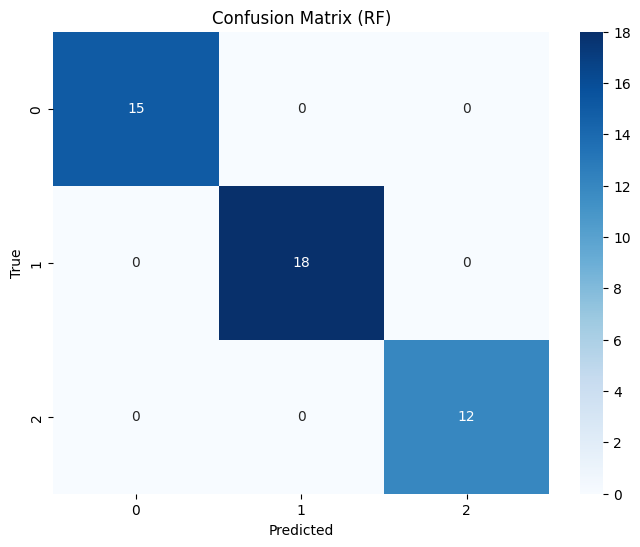

In [287]:
# Random Forest model evaluation
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy)

# Create a confusion matrix for random forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (RF)')
plt.show()

In [288]:
# Random forest classification report
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00        12

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [289]:
print(rf_model.score(X_train, y_train))
print(rf_model.score(X_test, y_test))

1.0
1.0


#The model seems to be over fittet so we'll make a Cross-Validation with Different Estimators:

[0.9496825396825397, 0.9609523809523809, 0.9609523809523809, 0.9720634920634922, 0.9665079365079364, 0.9665079365079364]


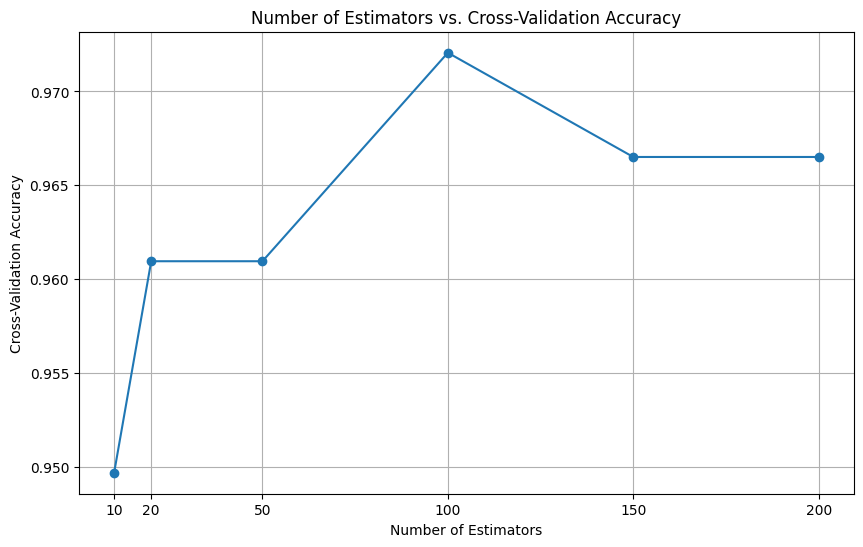

In [290]:
estimator_values = [10, 20, 50, 100, 150, 200]
cv_scores = []

for n_estimators in estimator_values:
    rf_model = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')
    cv_scores.append(np.mean(scores))

print(cv_scores)

plt.figure(figsize=(10, 6))
plt.plot(estimator_values, cv_scores, marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Number of Estimators vs. Cross-Validation Accuracy')
plt.xticks(estimator_values)
plt.grid(True)
plt.show()






#max depth

In [291]:
# max depth range
max_depth_range = list(range(1, 30))
accuracy_scores = []

for depth in max_depth_range:
    dec_tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dec_tree.fit(X_train, y_train)
    score = dec_tree.score(X_test, y_test)
    accuracy_scores.append(score)

# plot
fig = px.line(x=max_depth_range, y=accuracy_scores, markers=True, labels={'x': 'max_depth', 'y': 'Accuracy'})


fig.update_layout(
    title='Exactitud en función de max_depth para DecisionTreeClassifier',
    xaxis_title='Profundidad máxima (max_depth)',
    yaxis_title='Exactitud',
    showlegend=False
)

fig.show()

The best models seems to be the random forest and logistic regression but let's confirm with Lazy Predict

*   List item
*   List item



# Lazy Predict

In [301]:
!pip install lazypredict
from lazypredict.Supervised import LazyClassifier, LazyRegressor


# Create a LazyClassifier instance
clf = LazyClassifier(predictions=True)

# Fit and evaluate multiple models
models_summary = clf.fit(X_train, X_test, y_train, y_test)

# Display the summary of model performances
print(models_summary)

100%|██████████| 29/29 [00:00<00:00, 33.95it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000076 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 513
[LightGBM] [Info] Number of data points in the train set: 142, number of used features: 13
[LightGBM] [Info] Start training from score -1.149165
[LightGBM] [Info] Start training from score -0.912776
[LightGBM] [Info] Start training from score -1.266948
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 